In [2]:
!nvidia-smi

Mon Jun 16 15:32:52 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.05              Driver Version: 560.35.05      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA RTX 6000 Ada Gene...    On  |   00000000:13:00.0 Off |                  Off |
| 30%   30C    P8             22W /  300W |       2MiB /  49140MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
import torch

torch.cuda.empty_cache()

In [2]:
%pip install "ultralytics<=8.3.40" supervision roboflow
# prevent ultralytics from tracking your activity
!yolo settings sync=False
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.7 torch-2.7.0+cu126 CUDA:0 (NVIDIA RTX 6000 Ada Generation, 48539MiB)
Setup complete ✅ (13 CPUs, 120.3 GB RAM, 14.8/64.8 GB disk)


In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="TS1niacLXvvWTierCKCT")
project = rf.workspace("insectai").project("yolo_seg_insect_noclass")
version = project.version(1)
dataset = version.download("yolov5")
                

Defaulting to user installation because normal site-packages is not writeable
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to yolo_seg_insect_noclass-1 in yolov5pytorch:: 100%|██████████| 100/100 [00:00<00:00, 118.32it/s]


In [3]:
!yolo task=segment mode=train model=yolov8s-seg.pt  data=/hpc/home/mvr18/yolo_seg_insect_noclass-1/data.yaml epochs=200 imgsz=1500 patience=50 warmup_epochs=20 plots=True batch=2

New https://pypi.org/project/ultralytics/8.3.155 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.7 torch-2.7.0+cu126 CUDA:0 (NVIDIA RTX 6000 Ada Generation, 48539MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/hpc/home/mvr18/yolo_seg_insect_noclass-1/data.yaml, epochs=200, time=None, patience=50, batch=2, imgsz=1500, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, ret

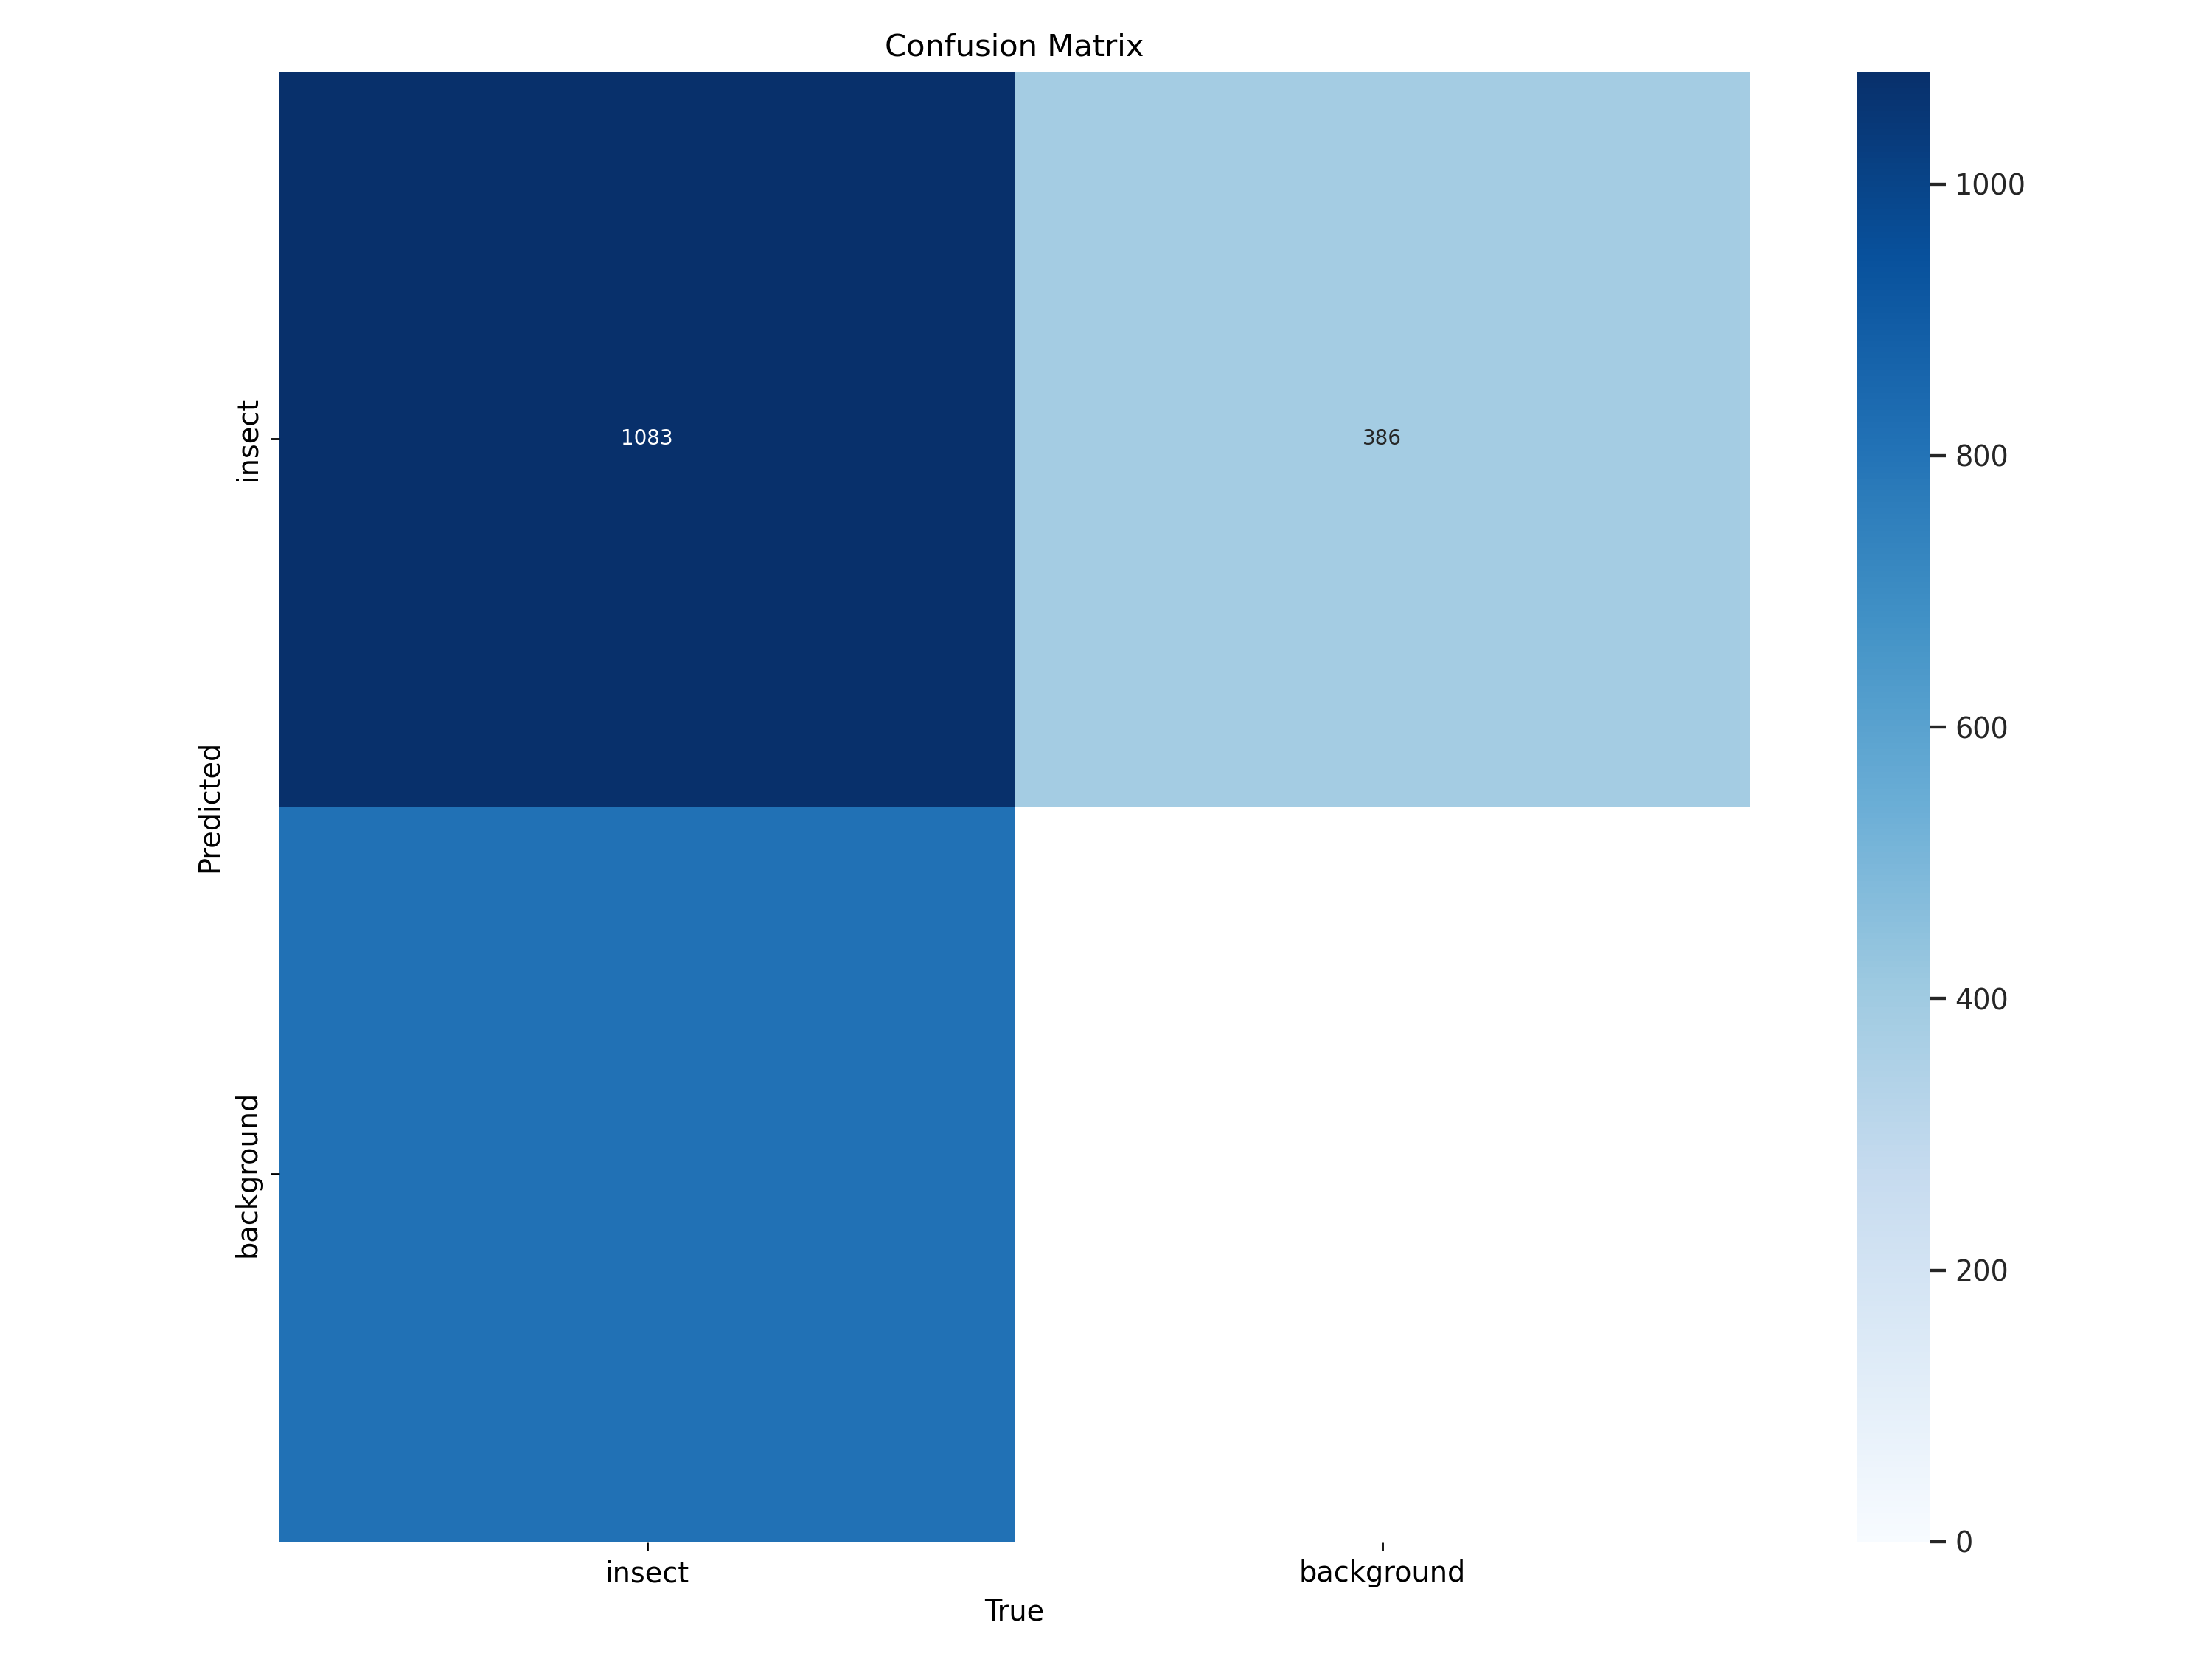

In [7]:
from IPython.display import Image
Image(filename='./runs/segment/train4/confusion_matrix.png', width=600)

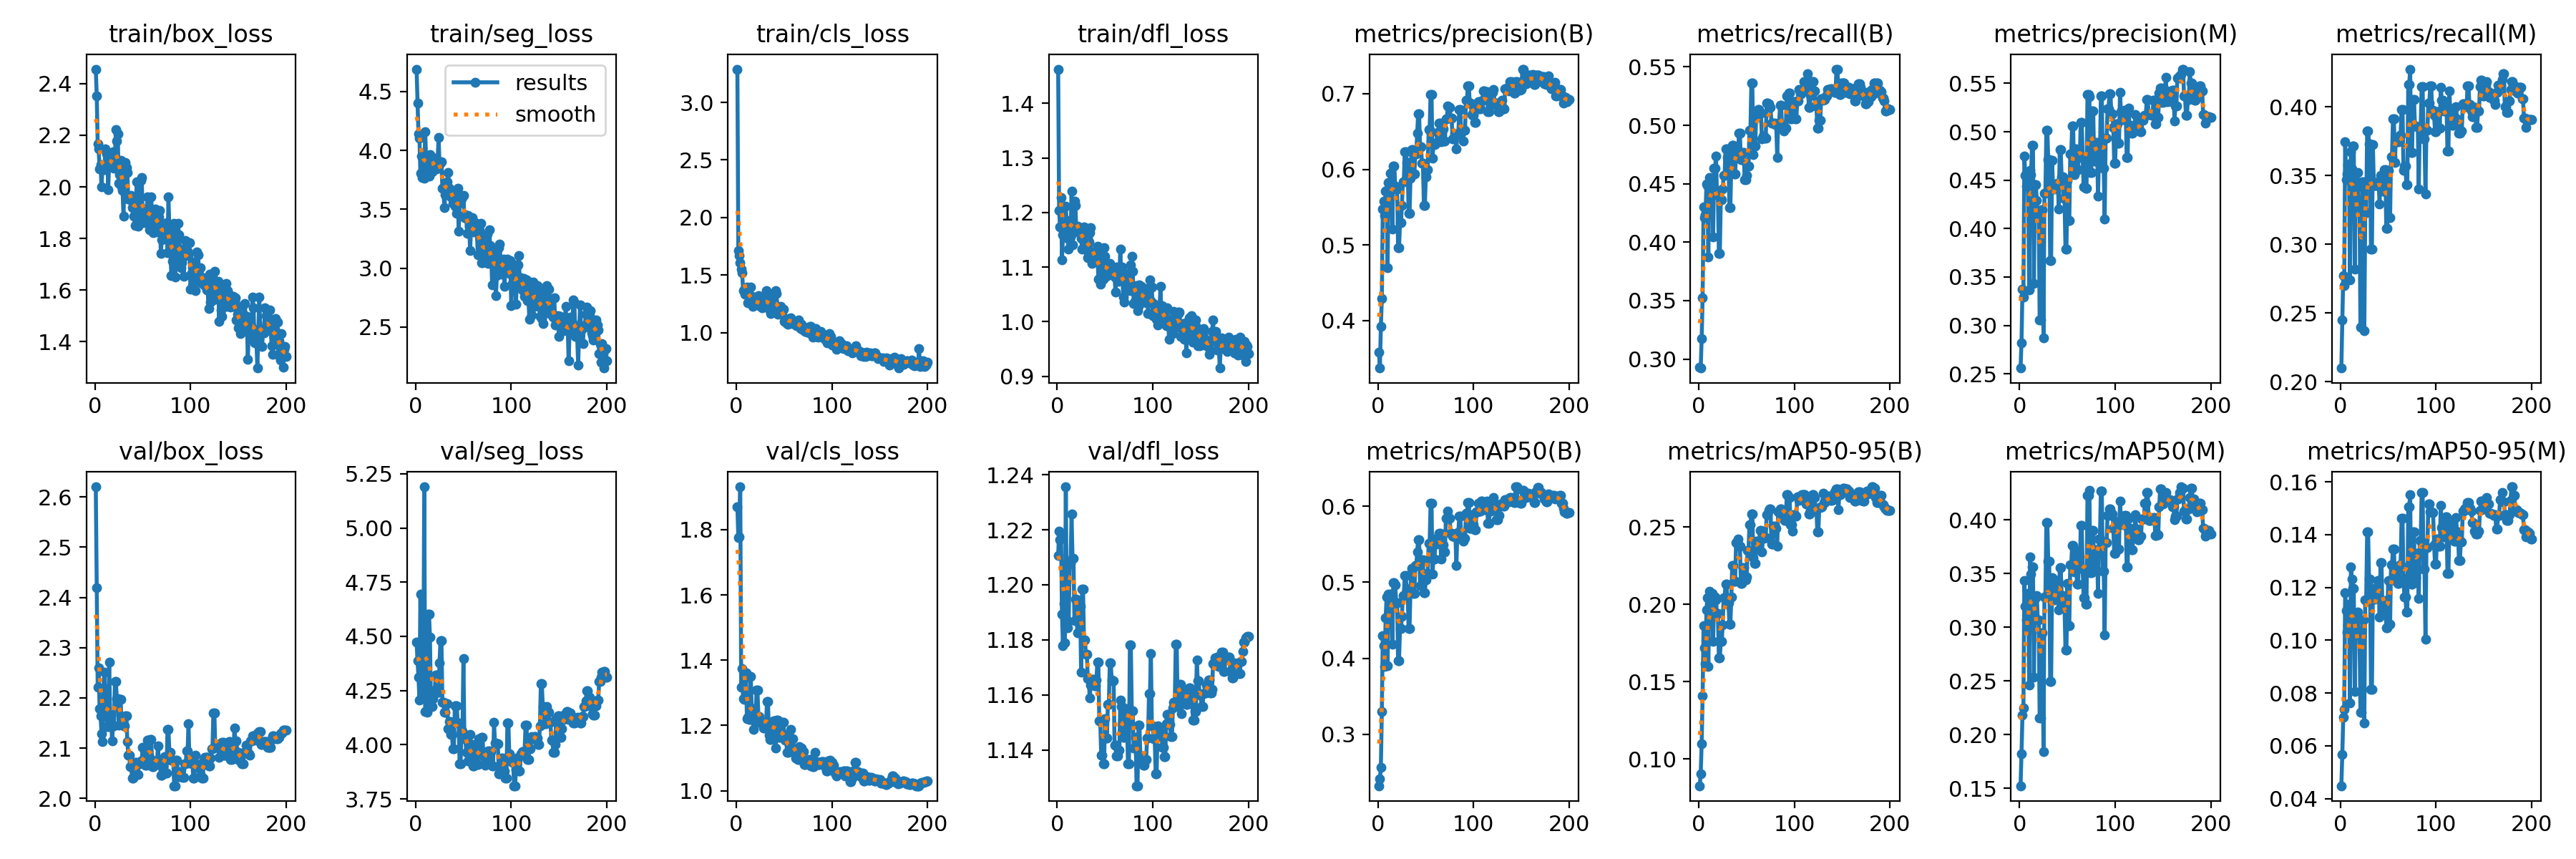

In [8]:
Image(filename='./runs/segment/train4/results.png', width=600)

In [11]:
!yolo task=segment mode=val model=./runs/segment/train4/weights/best.pt data=/hpc/home/mvr18/yolo_seg_insect_noclass-1/data.yaml split=test conf=0.25

Ultralytics 8.3.40 🚀 Python-3.11.7 torch-2.7.0+cu126 CUDA:0 (NVIDIA RTX 6000 Ada Generation, 48539MiB)
YOLOv8s-seg summary (fused): 195 layers, 11,779,987 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /hpc/home/mvr18/yolo_seg_insect_noclass-1/test/labels... 2 images,
val: New cache created: /hpc/home/mvr18/yolo_seg_insect_noclass-1/test/labels.cache
/hpc/home/mvr18/.local/lib/python3.11/site-packages/torch/utils/data/dataloader.py:626: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all          2        442      0.576      0.597      0.595      0.259      0

In [12]:
!yolo task=segment mode=val model=./runs/segment/train4/weights/best.pt data=/hpc/home/mvr18/yolo_seg_insect_noclass-1/data.yaml split=test

Ultralytics 8.3.40 🚀 Python-3.11.7 torch-2.7.0+cu126 CUDA:0 (NVIDIA RTX 6000 Ada Generation, 48539MiB)
YOLOv8s-seg summary (fused): 195 layers, 11,779,987 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /hpc/home/mvr18/yolo_seg_insect_noclass-1/test/labels.cache... 2 i
/hpc/home/mvr18/.local/lib/python3.11/site-packages/torch/utils/data/dataloader.py:626: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all          2        442      0.576      0.597      0.579       0.25      0.494      0.437      0.446      0.149
Speed: 1.5ms preprocess, 56.4ms inference, 0.0

In [14]:
!yolo task=segment mode=predict model=./runs/segment/train4/weights/best.pt conf=0.25 source=./yolo_seg_insect_noclass-1/test/images save=true conf=0.15

Ultralytics 8.3.40 🚀 Python-3.11.7 torch-2.7.0+cu126 CUDA:0 (NVIDIA RTX 6000 Ada Generation, 48539MiB)
YOLOv8s-seg summary (fused): 195 layers, 11,779,987 parameters, 0 gradients, 42.4 GFLOPs

image 1/2 /hpc/home/mvr18/yolo_seg_insect_noclass-1/test/images/W5_20220509_2_ST220182_A_JPG.rf.beebe75d717231bf1eab033ccf044edb.jpg: 1504x1152 222 insects, 41.5ms
image 2/2 /hpc/home/mvr18/yolo_seg_insect_noclass-1/test/images/W5_20220509_2_ST220182_B_JPG.rf.02c99eccfca5ea773484078bb58ba749.jpg: 1504x1152 300 insects, 5.0ms
Speed: 10.3ms preprocess, 23.2ms inference, 42.0ms postprocess per image at shape (1, 3, 1504, 1152)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict
